In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import plot_roc_curve

In [2]:
#Loading dataset
df = pd.read_csv(r"D:\Prasad\Eudeonix\Assigments\Project 10- Capstone Project ML\Dentistry Dataset.csv")
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [3]:
#Missing values
print(df.isnull().sum())

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [4]:
#Droping unuseful columns
df = df.drop(columns=['Sl No','Sample ID'])
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
#Label Encoding
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head(10)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
5,25,0,24.40,24.42,6.20,6.20,6.23,6.23,0.254,0.254,0.255,0.255
6,21,0,28.10,28.12,6.48,6.48,6.84,6.84,0.230,0.230,0.243,0.243
7,18,0,24.24,24.23,6.15,6.15,6.18,6.15,0.253,0.252,0.254,0.253
8,18,0,25.95,25.95,6.74,6.78,6.74,6.74,0.259,0.261,0.259,0.259
9,25,0,23.81,23.81,6.24,6.24,6.26,6.25,0.262,0.262,0.262,0.262


In [6]:
#Split independent and dependent variables
X = df.drop(columns=['Gender'])
y = df['Gender']

In [7]:
#Normalize the X variable      
normalizer = Normalizer()
X_transformed = normalizer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)
X_transformed.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,0.539364,0.563186,0.562961,0.136639,0.136639,0.136864,0.137088,0.005439,0.005439,0.005439,0.005416
1,0.495760,0.580940,0.581166,0.138137,0.138137,0.142644,0.142644,0.005341,0.005341,0.005566,0.005566
2,0.539971,0.559456,0.559456,0.138749,0.139923,0.147435,0.147435,0.005822,0.005822,0.006198,0.006198
3,0.455873,0.595370,0.595370,0.138585,0.138585,0.149526,0.149526,0.005288,0.005288,0.005698,0.005698
4,0.452767,0.596746,0.597878,0.137867,0.137867,0.147149,0.147149,0.005229,0.005229,0.005569,0.005569


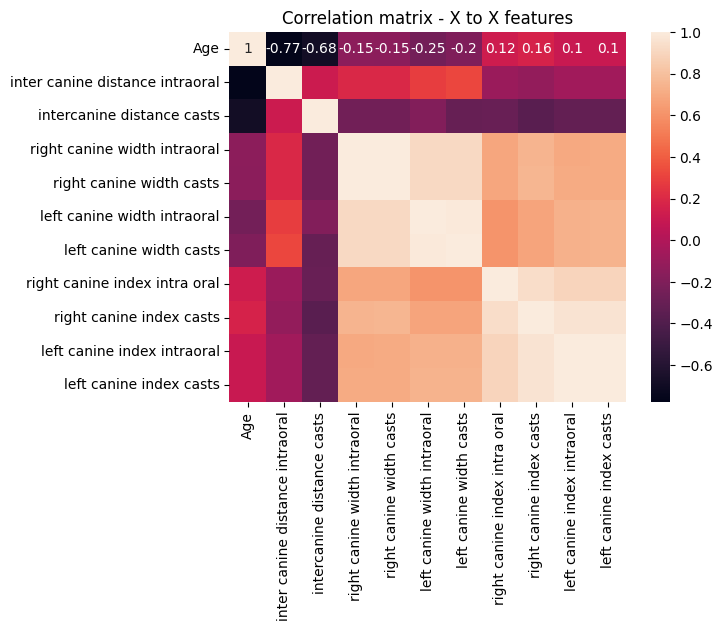

In [8]:
#Correlation Matrix
corr_mat_X = X_transformed.corr()

#Heatmap between X-to-X features 
plt.figure()
sns.heatmap(corr_mat_X, annot = True)
plt.title('Correlation matrix - X to X features')
plt.show()

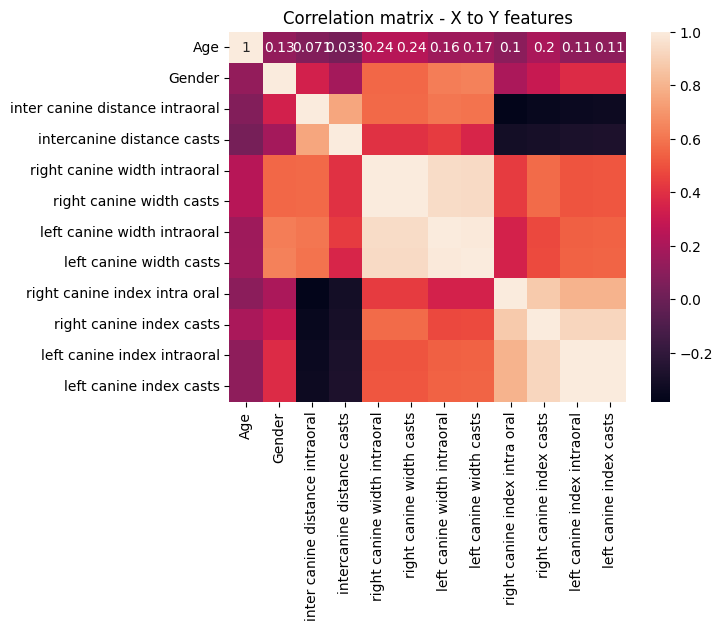

In [9]:
df_new = X_transformed.copy()
df_new['Gender'] = y
corr_mat_XY = df.corr()

#Heatmap between X-to-Y features 
plt.figure()
sns.heatmap(corr_mat_XY, annot = True)
plt.title('Correlation matrix - X to Y features')
plt.show()

In [10]:
'''Based on above heatmaps we can se that Age has very weak correlation with Gender. Therefore age column is dropped. 
Also there are some featuures which are highly correlated to each other, like intercanine distance casts and 
inter canine distance intraoral, right canine width casts and right canine width intraoral, left canine width casts and 
left canine width intraoral, right canine index casts and right canine index intra oral, left canine index casts and 
left canine index intraoral. So droping one from each of them.'''

X_transformed = X_transformed.drop(columns = ['Age', 'intercanine distance casts', 'right canine width casts',
                                              'left canine width casts','right canine index casts','left canine index casts'])

In [11]:
#Spliting the Data into Train and Test set
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y, test_size = 0.25, random_state = 0)

For Logistic Regression
Accuracy:  46.18181818181818
confusion matrix: 
 [[125   0]
 [148   2]]


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


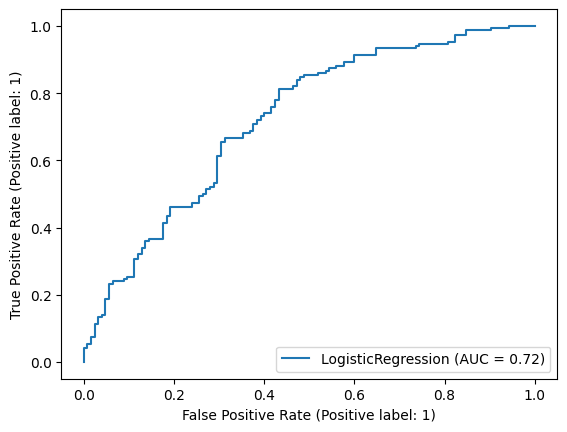

In [12]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,lr_y_pred)
lr_cm = confusion_matrix(y_test,lr_y_pred)
plot_roc_curve(lr,X_test,y_test)
print('For Logistic Regression')
print('Accuracy: ', lr_acc * 100)
print('confusion matrix: \n',lr_cm)


For Decision Tree
Accuracy:  83.27272727272728
confusion matrix: 
 [[111  14]
 [ 32 118]]


C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


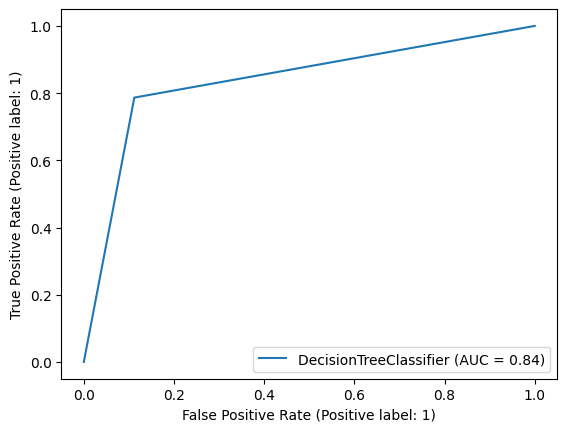

In [13]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test,dt_y_pred)
dt_cm = confusion_matrix(y_test,dt_y_pred)
plot_roc_curve(dt,X_test,y_test)
print('For Decision Tree')
print('Accuracy: ', dt_acc * 100)
print('confusion matrix: \n',dt_cm)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


For Random Forest
Accuracy:  87.63636363636364
confusion matrix: 
 [[113  12]
 [ 22 128]]


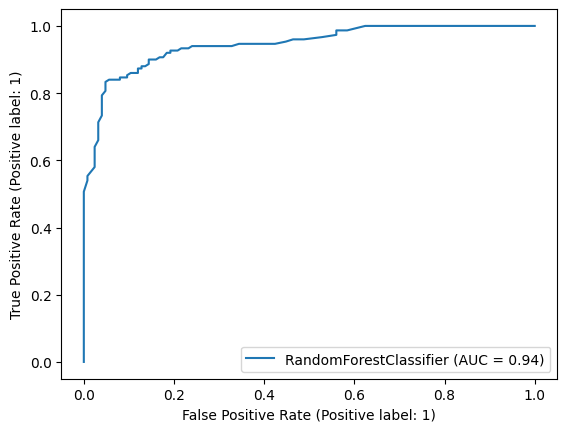

In [14]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test,rf_y_pred)
rf_cm = confusion_matrix(y_test,rf_y_pred)
plot_roc_curve(rf,X_test,y_test)
print('For Random Forest')
print('Accuracy: ', rf_acc * 100)
print('confusion matrix: \n',rf_cm)

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


For XGBoostg Classifier
Accuracy:  87.63636363636364
confusion matrix: 
 [[114  11]
 [ 23 127]]


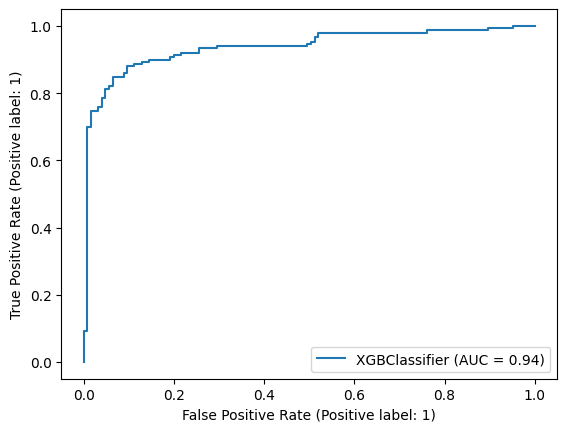

In [15]:
#XGBoost 
xgb_clsfr = xgb.XGBClassifier()
xgb_clsfr.fit(X_train,y_train)
xgb_y_pred = xgb_clsfr.predict(X_test)
xgb_acc = accuracy_score(y_test,xgb_y_pred)
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
plot_roc_curve(xgb_clsfr,X_test,y_test)
print('For XGBoostg Classifier')
print('Accuracy: ', xgb_acc * 100)
print('confusion matrix: \n',xgb_cm)